$$\Large \color{blue}{\textbf{The Role of the Resampling Methond}}$$

$$\small \color{green}{\textbf{Written and Coded by}}$$
$$\large \color{green}{\textbf{Phuong Van Nguyen}}$$
$$\small \color{red}{\textbf{ phuong.nguyen@summer.barcelonagse.eu}}$$

# Introduction

In this project, we investigate the role of resampling data to the performance of a Machine Learning model. To this end, we train three different Machine Learning algorithms based on the data on the default of credit card clients. We find that the resampling method can improve the performance of a Machine Learning model. Furthermore, it reduces the problem of high variance and overfitting.

# Preparing project


## Loading Lib

In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.2.post1.


In [2]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.0.3


In [3]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [4]:
import os
import itertools
import math

import mglearn
import scipy.interpolate
import scipy.integrate
from timeit import default_timer as timer
import numpy as np
import pandas as pd
from patsy import dmatrices
from scipy import stats
from pandas import set_option
from pandas.plotting import scatter_matrix
from timeit import default_timer as timer
from sklearn.preprocessing import label_binarize
from math import log2
from scipy.stats import sem

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import preprocessing
#from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [5]:
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import (brier_score_loss, precision_score, recall_score)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [7]:
from pickle import dump
from pickle import load
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'
from pprint import pprint

## Loading data

In [8]:
print(Bold + Blue + 'Your current working directory:' + End)
print(os.getcwd())

Your current working directory:
C:\Users\Phuong_1\Dropbox\Machine Learning\VCB


In [9]:
#data= pd.read_csv('default of credit card clients.csv',header=1)

In [10]:
# data from Kaggle Project
path='C://Users//Phuong_1//Dropbox//Machine Learning//VCB//UCI_Credit_Card.csv'
data=pd.read_csv(path+'//UCI_Credit_Card.csv')

# Exploratory data analysis

Some ideas for exploration:

1. How does the probability of default payment vary by categories of different demographic variables?

2. Which variables are the strongest predictors of default payment?

## General information

In [11]:
print(Bold+'General inforamation about raw data:'+End)
print(data.info())
print(Bold+'The number of row:' + End + '%d'%len(data))
print(Bold+'The number of columns:' + End + '%d'%len(data.columns))
print(Bold+ 'The list of features:'+End)
print(data.columns.tolist())
print(Bold+'The first %d observation'%(len(data.head(3))) + End)
print(data.head(3))
print(Bold+'The missing data:'+End)
print(data.isnull().sum())

General inforamation about raw data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                   

## Descriptive statistics

In [12]:
print(Bold+'Descriptive statistics of %d features:'%len(data.columns[1:25])+End)
#print(data[data.columns[1:25]] .describe().T)
data[data.columns[1:25]] .describe().T

Descriptive statistics of 24 features:


,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


## Categorical variables

### SEX

#### Handling abnornal values of SEX

The unique values of SEX:
[2, 1]
The number of 1-valued variables:11888 (39.63 %) 
The number of 2-valued variables:18112 (60.37 %) 


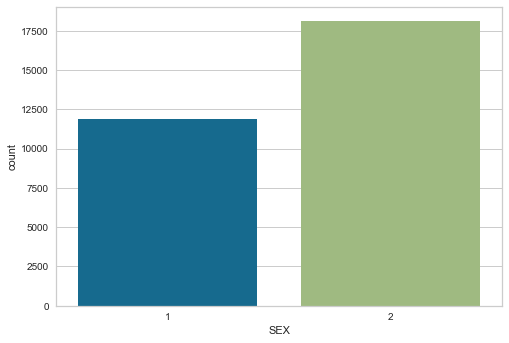

In [13]:
print(Bold+'The unique values of SEX:'+End)
print(data['SEX'].unique().tolist())
print(Bold + 'The number of 1-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['SEX'][data.SEX==1].value_counts(), 
                100*data['SEX'][data.SEX==1].value_counts()/len(data['SEX'])))
print(Bold + 'The number of 2-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['SEX'][data.SEX==2].value_counts(), 
                100*data['SEX'][data.SEX==2].value_counts()/len(data['SEX'])))
sns.countplot(x='SEX', data=data)
plt.show()

#### Relationship of SEX with the target feature

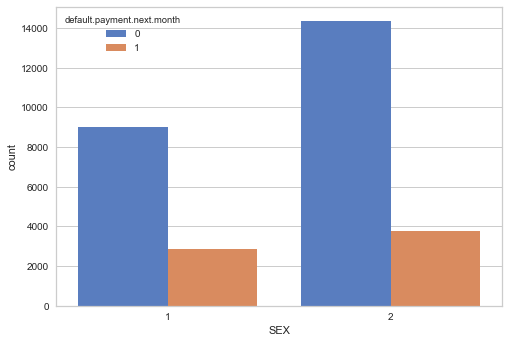

In [14]:
g=sns.countplot(x="SEX", data=data,hue="default.payment.next.month", palette="muted")

$$\textbf{Comments:}$$
Interestingly, even though a number of a non-default female are significantly higher than that of non-default male, a number of a default female are higher than that of the default male.

### EDUCATION

#### Handling abnormal values

The unique values of EDUCATION:
[2, 1, 3, 5, 4, 6, 0]
The number of unique values:
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
The distribution of unique values of EDUCATION:


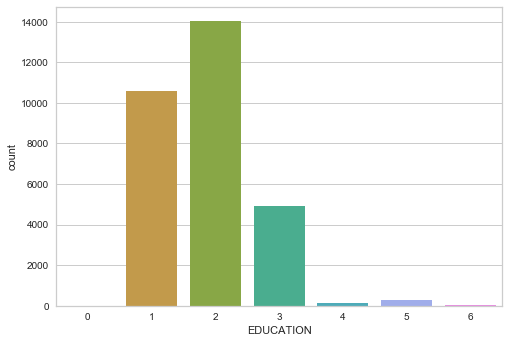

In [15]:
print(Bold+'The unique values of EDUCATION:'+End)
print(data['EDUCATION'].unique().tolist())
print(Bold+'The number of unique values:'+End)
print(data['EDUCATION'].value_counts())
print(Bold+'The distribution of unique values of EDUCATION:'+End)
sns.countplot(x='EDUCATION', data=data)
plt.show()

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown). Let's merge 0, 5, and 6 into the category of 4 as follows.

In [16]:
data['EDUCATION']=data['EDUCATION'].replace([0,5,6],4)
print(Bold+'The unique values of EDUCATION:'+End)
print(data['EDUCATION'].unique().tolist())

The unique values of EDUCATION:
[2, 1, 3, 4]


The number of 1-valued variables:10585 (35.28 %) 
The number of 2-valued variables:14030 (46.77 %) 
The number of 3-valued variables:4917 (16.39 %) 
The number of 4-valued variables:468 (1.56 %) 


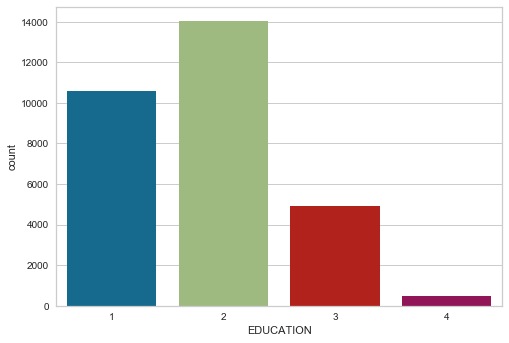

In [17]:
print(Bold + 'The number of 1-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['EDUCATION'][data.EDUCATION==1].value_counts(), 
                100*data['EDUCATION'][data.EDUCATION==1].value_counts()/len(data['EDUCATION'])))
print(Bold + 'The number of 2-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['EDUCATION'][data.EDUCATION==2].value_counts(), 
                100*data['EDUCATION'][data.EDUCATION==2].value_counts()/len(data['EDUCATION'])))
print(Bold + 'The number of 3-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['EDUCATION'][data.EDUCATION==3].value_counts(), 
                100*data['EDUCATION'][data.EDUCATION==3].value_counts()/len(data['EDUCATION'])))
print(Bold + 'The number of 4-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['EDUCATION'][data.EDUCATION==4].value_counts(), 
                100*data['EDUCATION'][data.EDUCATION==4].value_counts()/len(data['EDUCATION'])))
sns.countplot(x='EDUCATION', data=data)
plt.show()

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

The majority of the client using the credit cards are undergraduate students, followed by graduate students. The third-largest client group is high school students.

#### Relationship of EDUCATION with the target feature

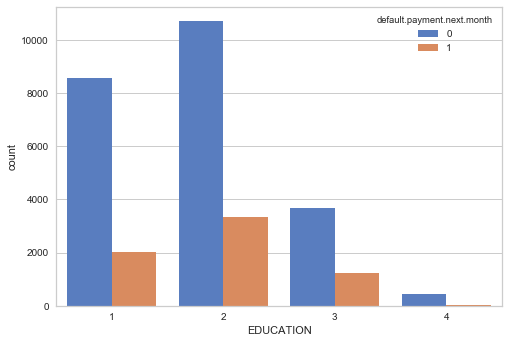

In [18]:
g=sns.countplot(x='EDUCATION', data=data,hue="default.payment.next.month", palette="muted")

$$\textbf{Comments:}$$

The client group with the largest default rate is an undergraduate student.

### MARRIAGE

#### Handling abnormal values

The unique values of MARRIAGE:
[1, 2, 3, 0]
The number of unique values:
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
The distribution of unique values of MARRIAGE:


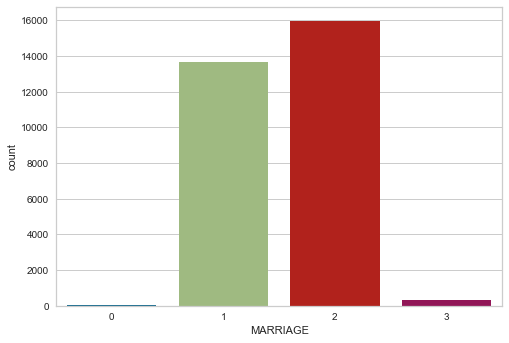

In [19]:
print(Bold+'The unique values of MARRIAGE:'+End)
print(data['MARRIAGE'].unique().tolist())
print(Bold+'The number of unique values:'+End)
print(data['MARRIAGE'].value_counts())
print(Bold+'The distribution of unique values of MARRIAGE:'+End)
sns.countplot(x='MARRIAGE', data=data)
plt.show()

MARRIAGE: Marital status (1=married, 2=single, 3=others). Let's merge the group of 0 into the group of 3, such as others.

The unique values of MARRIAGE:
[1, 2, 3]
The number of unique values:
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64
The number of 1-valued variables:13659 (45.53 %) 
The number of 2-valued variables:15964 (53.21 %) 
The number of 3-valued variables:377 (1.26 %) 


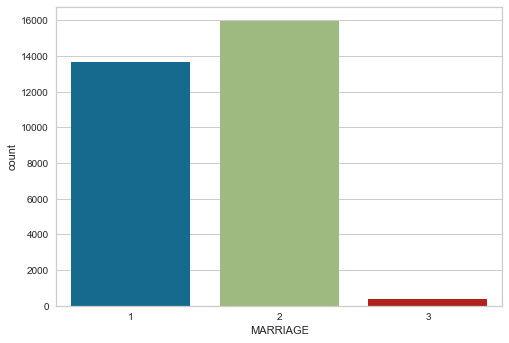

In [20]:
data['MARRIAGE']=data['MARRIAGE'].replace(0,3)
print(Bold+'The unique values of MARRIAGE:'+End)
print(data['MARRIAGE'].unique().tolist())
print(Bold+'The number of unique values:'+End)
print(data['MARRIAGE'].value_counts())

print(Bold + 'The number of 1-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['MARRIAGE'][data.MARRIAGE==1].value_counts(), 
                100*data['MARRIAGE'][data.MARRIAGE==1].value_counts()/len(data['MARRIAGE'])))
print(Bold + 'The number of 2-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['MARRIAGE'][data.MARRIAGE==2].value_counts(), 
                100*data['MARRIAGE'][data.MARRIAGE==2].value_counts()/len(data['MARRIAGE'])))
print(Bold + 'The number of 3-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['MARRIAGE'][data.MARRIAGE==3].value_counts(), 
                100*data['MARRIAGE'][data.MARRIAGE==3].value_counts()/len(data['MARRIAGE'])))
sns.countplot(x='MARRIAGE', data=data)
plt.show()

MARRIAGE: Marital status (1=married, 2=single, 3=others)

The largest client group using the credit cards is the single one, followed by the married group.

#### Relationship of MARRIGAE with the target feature

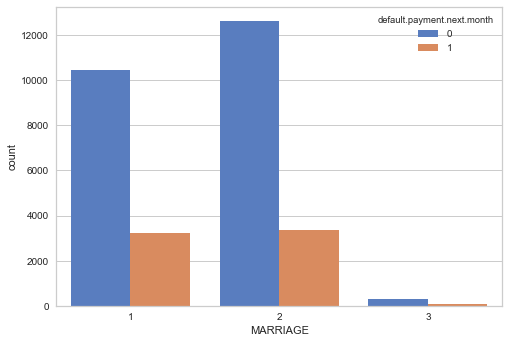

In [21]:
g=sns.countplot(x='MARRIAGE', data=data,hue="default.payment.next.month", palette="muted")

## Repayment status variables

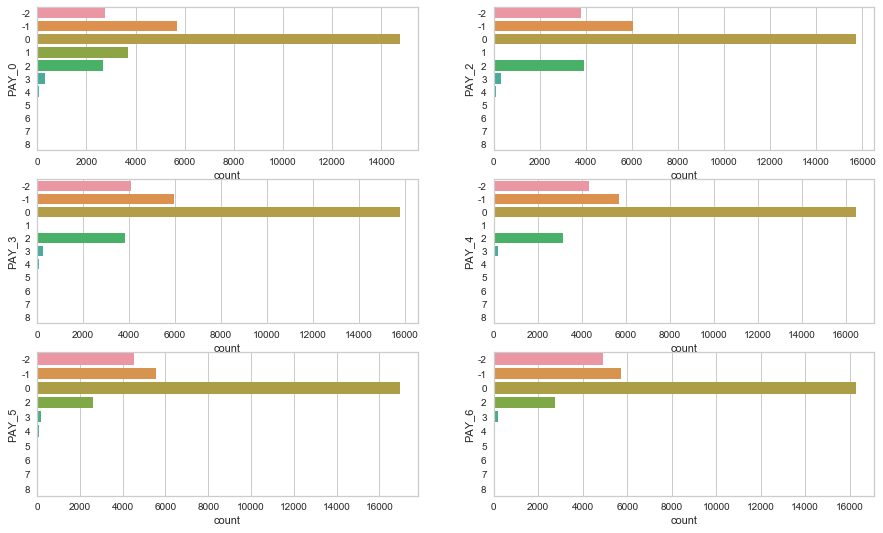

In [22]:
repay_vars=['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15, 9))
for i,col in enumerate(repay_vars):
    plt.subplot(3,2,i+1)
    sns.countplot(y=col,data=data,
              orient='h')

$$\textbf{Comments:}$$

Repayment status in month, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

But, there are two abnormal values of -2 and 0. How to intepret them? Can we replace this abnormal value by 9? I really do not know how to handle these abnormal values of -2 and 0.

## Continuous variables (float64-formated ones)

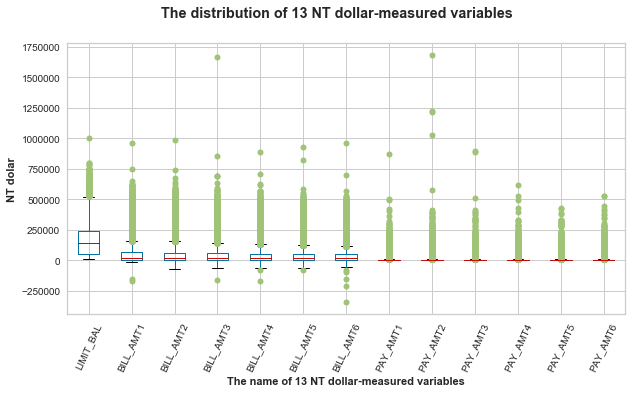

In [42]:
con_vars=data.loc[:,data.dtypes==np.float64].columns.tolist()
boxplot=data.boxplot(column=con_vars,figsize=(10,5),rot=65,sym='go')
plt.suptitle('The distribution of %d NT dollar-measured variables'%len(con_vars)
             ,fontweight='bold')
plt.ylabel('NT dolar',fontweight='bold')
plt.xlabel('The name of %d NT dollar-measured variables'%len(con_vars),fontweight='bold')
plt.show()

 $$\textbf{Comments:}$$
 
 There are big difference in scale among NT Dollar-measured variables. Indeed, We suspect that the differing scales of the raw data may be negatively impacting the skill of
some of the algorithms.

## Relation with label

### Limit_bal

### Correlation among explanatory variables

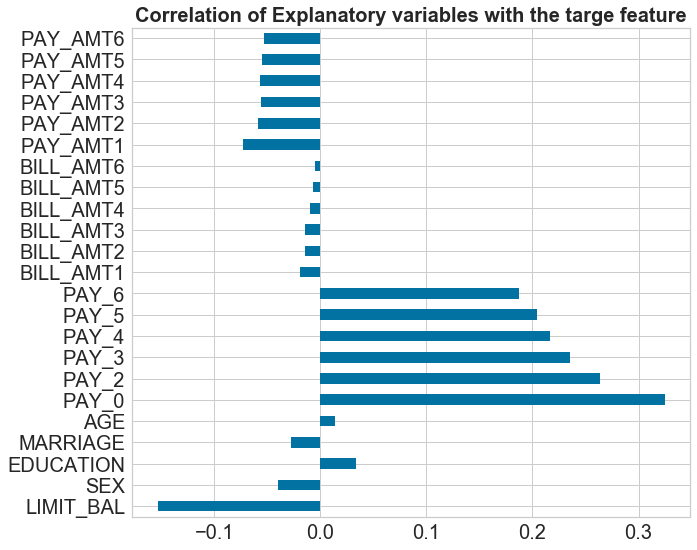

In [295]:
fig=plt.figure(figsize=(10,9))
data[data.columns[1:24]].corrwith(data['default.payment.next.month']).plot.barh(fontsize = 20,
                                                                                rot = 0, grid = True)
plt.title( "Correlation of Explanatory variables with the targe feature",
          fontsize = 20,fontweight='bold')
plt.show()

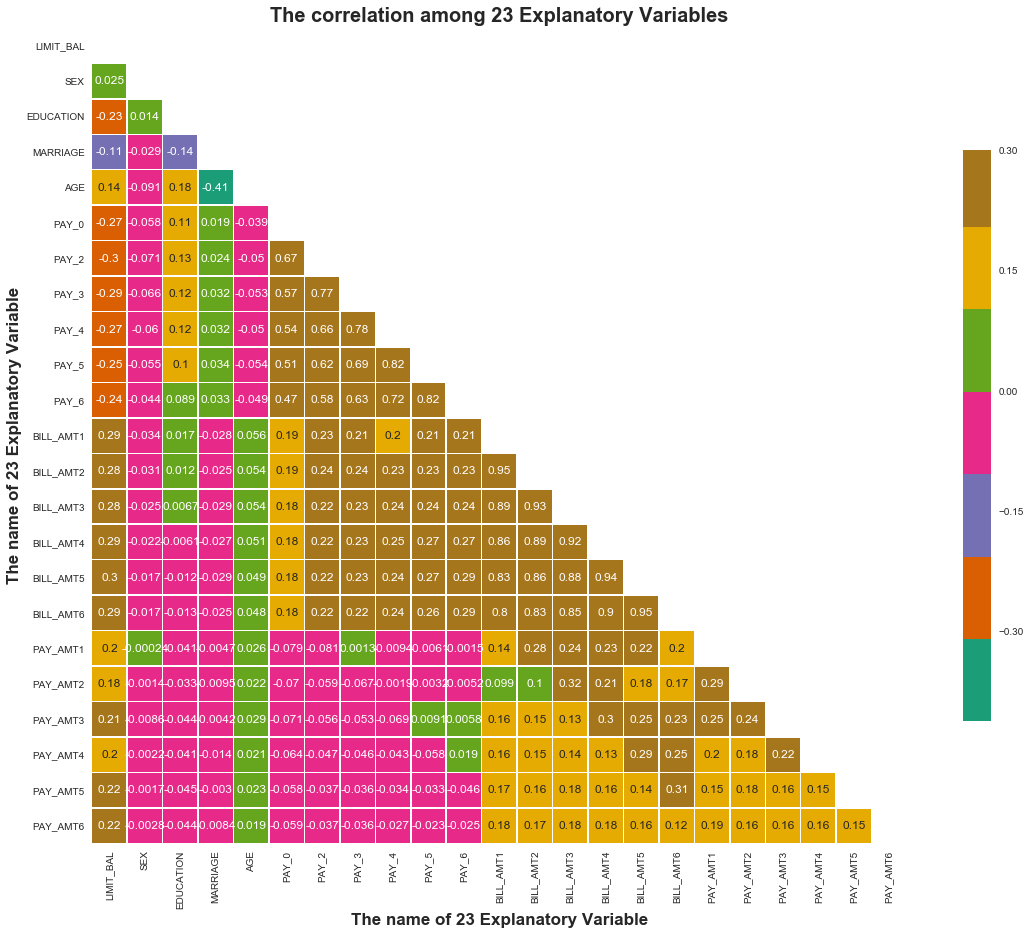

In [296]:
correlations_exvar=data[data.columns[1:24]].corr()
plt.figure(figsize=(20, 15))
mask1 = np.zeros_like(correlations_exvar, dtype=np.bool)
mask1[np.triu_indices_from(mask1)] = True
cmap = 'Dark2'# sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlations_exvar,cmap=cmap, mask=mask1,annot=True,
            square=True
           ,vmax=.3, center=0,
            linewidths=.5, cbar_kws={"shrink": 0.7})
plt.title('The correlation among %d Explanatory Variables'% len(data[data.columns[1:24]].columns),
          fontsize=20, fontweight='bold')
plt.ylabel('The name of %d Explanatory Variable'%len(data[data.columns[1:24]].columns),
          fontsize=17, fontweight='bold')
plt.xlabel('The name of %d Explanatory Variable'%len(data[data.columns[1:24]].columns),
          fontsize=17, fontweight='bold')
plt.show()

### Correlation with the threshold

In [297]:
def correlation_select(correlation, threshold):
    correlation_up=correlation.where(np.triu(np.ones(correlation.shape), k = 1).astype(np.bool))
    select_corr= [column for column in correlation_up.columns if any(abs(correlation_up[column])>threshold)]
    # printing
    print(Bold+ Red +'------------------------------------------------------------------'+End)
    print(Bold+ f'A pair with with correlation over {threshold}:'+End + '%d'%len(select_corr))
    #print(len(select_corr))
    print(Bold+ Red +'------------------------------------------------------------------'+End)
    print(Bold+f'List of pair with correlation over {threshold}:' + End)
    print(select_corr)
    print(Bold+ Red +'------------------------------------------------------------------'+End)
    record_select_correlation=pd.DataFrame(columns=['Attribute_1','Attribute_2','Correlation_Value'])
    for column in select_corr:
        Attribute_11=list(correlation_up.index[abs(correlation_up[column])>threshold])
        Attribute_21=[column for _ in range(len(Attribute_11))]
        Correlation_Value1=list(correlation_up[column][abs(correlation_up[column])>threshold])
        temp_df_corr=pd.DataFrame.from_dict({'Attribute_1': Attribute_11,
                                      'Attribute_2': Attribute_21,
                                      'Correlation_Value': Correlation_Value1})
        record_select_correlation=record_select_correlation.append(temp_df_corr,ignore_index=True)
    print(Bold+f'All pairs with correlation over {threshold}:')
    print(Bold+ Red +'------------------------------------------------------------------'+End)
    return record_select_correlation;

In [298]:
record_select_correlation=correlation_select(correlation=correlations_exvar, threshold=0.5)
print(record_select_correlation)

------------------------------------------------------------------
A pair with with correlation over 0.5:10
------------------------------------------------------------------
List of pair with correlation over 0.5:
['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
------------------------------------------------------------------
All pairs with correlation over 0.5:
------------------------------------------------------------------
   Attribute_1 Attribute_2  Correlation_Value
0        PAY_0       PAY_2           0.672164
1        PAY_0       PAY_3           0.574245
2        PAY_2       PAY_3           0.766552
3        PAY_0       PAY_4           0.538841
4        PAY_2       PAY_4           0.662067
5        PAY_3       PAY_4           0.777359
6        PAY_0       PAY_5           0.509426
7        PAY_2       PAY_5           0.622780
8        PAY_3       PAY_5           0.686775
9        PAY_4       PAY_5           0.8198

## The target feature

In [57]:
y=data['default.payment.next.month'].values
y[0:4]

array([1, 1, 0, 0], dtype=int64)

The unique values of SEX:
[1, 0]
The number of 1-valued variables:6636 (22.12 %) 
The number of 2-valued variables:23364 (77.88 %) 


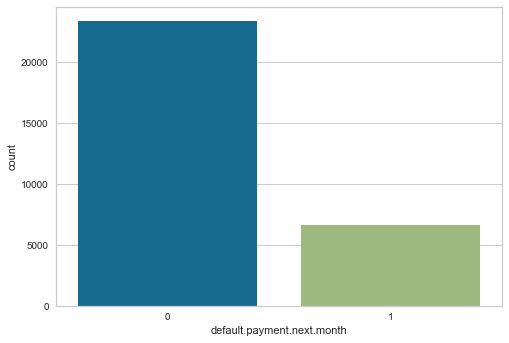

In [58]:
print(Bold+'The unique values of SEX:'+End)
print(data['default.payment.next.month'].unique().tolist())
print(Bold + 'The number of 1-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['default.payment.next.month'][data['default.payment.next.month']==1].value_counts(), 
                100*data['default.payment.next.month'][data['default.payment.next.month']==1].value_counts()/len(data['default.payment.next.month'])))
print(Bold + 'The number of 2-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['default.payment.next.month'][data['default.payment.next.month']==0].value_counts(), 
                100*data['default.payment.next.month'][data['default.payment.next.month']==0].value_counts()/len(data['default.payment.next.month'])))
sns.countplot(x='default.payment.next.month', data=data)
plt.show()

## The explanatory variables

In [60]:
X=data.iloc[:,1:-1].values
X[:2]

array([[ 2.000e+04,  2.000e+00,  2.000e+00,  1.000e+00,  2.400e+01,
         2.000e+00,  2.000e+00, -1.000e+00, -1.000e+00, -2.000e+00,
        -2.000e+00,  3.913e+03,  3.102e+03,  6.890e+02,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  6.890e+02,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00],
       [ 1.200e+05,  2.000e+00,  2.000e+00,  2.000e+00,  2.600e+01,
        -1.000e+00,  2.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         2.000e+00,  2.682e+03,  1.725e+03,  2.682e+03,  3.272e+03,
         3.455e+03,  3.261e+03,  0.000e+00,  1.000e+03,  1.000e+03,
         1.000e+03,  0.000e+00,  2.000e+03]])

## The distribution of data

### Defining a UDF fucntion

In [61]:
def plot_imbalance(X: np.ndarray, y: np.ndarray,nco,ncom):
    plt.figure(figsize=(12, 7))
    plt.scatter(X[y == 0, nco], X[y == 0, ncom],
                label="No Default", color='b', alpha=0.7,
            marker='X', linewidth=0.15)
    plt.scatter(X[y == 1, nco], X[y == 1, ncom], 
                label="Default", color='r', 
            marker='v',alpha=0.5, linewidth=0.15)
    plt.legend()
    return plt.show()

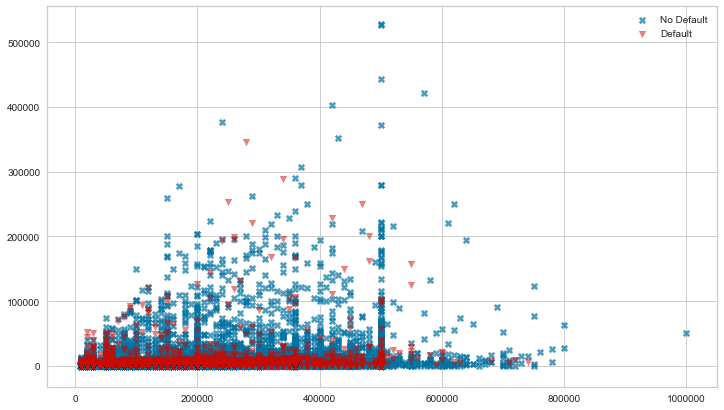

In [62]:
plot_imbalance(X, y,0,-1)

### Reproduced using the DataFrame

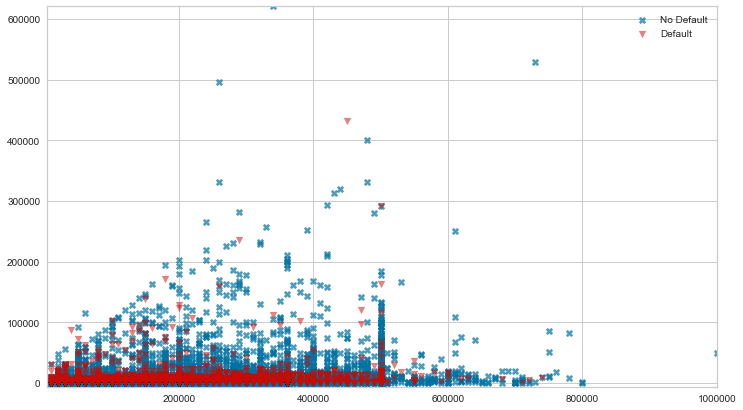

In [63]:
plt.figure(figsize=(12, 7))
plt.scatter(data[data.columns[1:25]]['LIMIT_BAL'][data[data.columns[1:25]]['default.payment.next.month']==0],
            data[data.columns[1:25]]['PAY_AMT4'][data[data.columns[1:25]]['default.payment.next.month']==0], 
            label="No Default", color='b', alpha=0.7,
            marker='X', linewidth=0.15)
plt.scatter(data[data.columns[1:25]]['LIMIT_BAL'][data[data.columns[1:25]]['default.payment.next.month']==1],
            data[data.columns[1:25]]['PAY_AMT4'][data[data.columns[1:25]]['default.payment.next.month']==1], 
            label="Default", color='r', 
            marker='v',alpha=0.5, linewidth=0.15)
plt.autoscale(enable=True, axis='both',tight=True)
plt.legend()
plt.show()

# Preparing data

## Spliting data

In [64]:
seed=7 # for repeatable
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=seed)
print(Bold+'The size of the training data:'+End)
print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}')
print(Bold+'The size of the test data:'+End)
print(f'X_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')

The size of the training data:
X_train shape: (24000, 23)
y_train shape: (24000,)
The size of the test data:
X_test shape: (6000, 23)
y_test shape: (6000,)


In [662]:
x_test=pd.DataFrame(data=X_test,
                    columns=data[data.columns[1:24]].columns)
x_test.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2.0,1.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0,...,16262.0,16749.0,13764.0,18732.0,1600.0,1550.0,1000.0,1000.0,5283.0,0.0
1,10000.0,2.0,2.0,1.0,22.0,-1.0,-1.0,-1.0,0.0,0.0,...,9159.0,9363.0,8160.0,7552.0,390.0,9159.0,700.0,279.0,1000.0,800.0


## The distribution of the train data

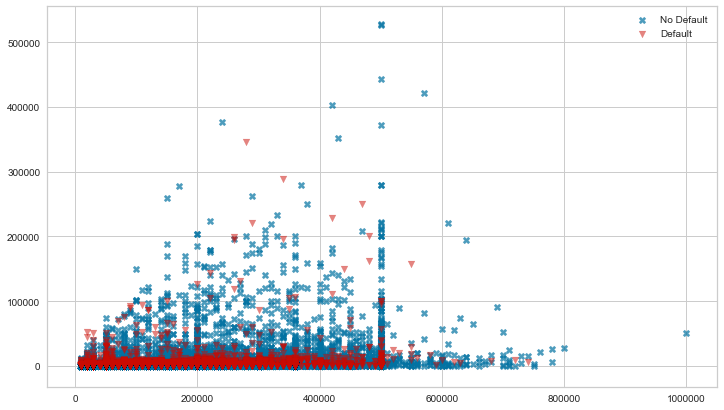

In [65]:
plot_imbalance(X_train, y_train,0,-1)

Since we know that the data set is higly imbanced. Thus, we solve this problem by using Synthetic Minority Oversampling Technique, known as SMOTE as follows.

## SMOTE

It is worth noting that we apply resampling to the training data only

In [66]:
method_smote=SMOTE(random_state=seed)
X_resampled,y_resampled=method_smote.fit_sample(X_train, y_train)

## Checking SMOTE

### Computing the ratio

In [67]:
print(Bold+'Before resampling with SMOTE:'+End)
print(pd.value_counts(pd.Series(y_train)))
print(Bold+'After resampling with SMOTE:'+End)
print(pd.value_counts(pd.Series(y_resampled)))
#y_resampled.value_counts()

Before resampling with SMOTE:
0    18654
1     5346
dtype: int64
After resampling with SMOTE:
1    18654
0    18654
dtype: int64


### Visualisation

In [68]:
def compare_plot(X: np.ndarray, y: np.ndarray, 
                 X_resampled: np.ndarray, 
                 y_resampled: np.ndarray, 
                 nco,ncom,
                 method: str):
    plt.figure(figsize=(12, 7))
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, nco], X[y == 0, ncom], 
                label="No Default", color='b', alpha=0.7,
                marker='X', linewidth=0.15)
    plt.scatter(X[y == 1, nco], X[y == 1, ncom], 
                label="Default", color='r', 
                marker='v',alpha=0.5, linewidth=0.15)
    plt.title('Original Dataset')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, nco], X_resampled[y_resampled == 0, ncom], 
                label="No Default", color='b', alpha=0.7,
                marker='X', linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, nco], X_resampled[y_resampled == 1, ncom], 
                label="Default", color='r', 
                marker='v',alpha=0.5, linewidth=0.15)
    plt.title(method)
    plt.legend()
    plt.show()

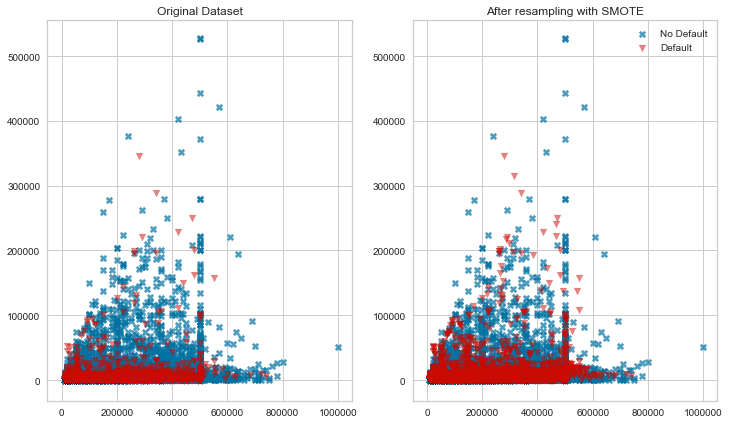

In [69]:
compare_plot(X_train, y_train, X_resampled, y_resampled,0,-1, method='After resampling with SMOTE')

## Converting to Pandas type

In [70]:
x_resampled=pd.DataFrame(data=X_resampled,
                           columns=data[data.columns[1:24]].columns)
x_resampled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,480000.0,1.0,2.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,300134.0,315067.0,321825.0,328781.0,15000.0,30000.0,20000.0,12000.0,12500.0,12200.0
1,210000.0,2.0,1.0,2.0,29.0,1.0,-1.0,-1.0,-2.0,-1.0,...,-12.0,-12.0,5884.0,0.0,2437.0,0.0,0.0,5896.0,0.0,89886.0
2,230000.0,2.0,2.0,2.0,28.0,0.0,0.0,2.0,2.0,2.0,...,201358.0,204067.0,200720.0,212403.0,18150.0,7200.0,7500.0,0.0,15079.0,8000.0
3,80000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,...,63342.0,51529.0,41484.0,34097.0,20024.0,10000.0,4000.0,2000.0,3000.0,2500.0
4,130000.0,1.0,1.0,2.0,33.0,1.0,2.0,2.0,2.0,0.0,...,40851.0,39526.0,41346.0,40630.0,0.0,6000.0,0.0,3000.0,1000.0,1100.0


## Standardizing data

In [71]:
standardized_x = preprocessing.scale(X_resampled)
standardized_x[1:5]

array([[ 0.4383536 ,  0.88824971, -1.24100262,  0.92311862, -0.74298825,
         0.62808243, -0.83982944, -0.79334348, -1.52181029, -0.71444262,
        -0.67954967, -0.68168068, -0.64515535, -0.67073953, -0.66439556,
        -0.5579605 , -0.64898773, -0.16073644, -0.24239006, -0.27847209,
         0.13433452, -0.29697418,  5.51504277],
       [ 0.59657352,  0.88824971,  0.20474505,  0.92311862, -0.85632918,
        -0.20090862, -0.06414101,  1.52851026,  1.58740823,  1.67586189,
         1.69845585,  1.83901674,  2.11013213,  2.23592358,  2.49306798,
         2.63129097,  2.91450214,  0.91636215,  0.11334071,  0.18707847,
        -0.30369967,  0.77290632,  0.23141247],
       [-0.5900759 , -1.27053975, -1.24100262,  0.92311862, -0.96967011,
        -0.20090862, -0.06414101, -0.01939223,  0.03279897,  0.08232555,
         0.11311884,  0.3332273 ,  0.33825498,  0.24373996,  0.13303499,
         0.02477242, -0.0769416 ,  1.04482157,  0.25168045, -0.03017846,
        -0.15511277, -0.0841

## Converting to Pandas type

In [72]:
standardized_x_pandas=pd.DataFrame(data=standardized_x,
                           columns=data[data.columns[1:24]].columns)
standardized_x_pandas.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2.574323,-1.27054,0.204745,-1.115575,0.390421,-0.200909,-0.064141,-0.019392,0.032799,0.082326,...,3.661700,4.210435,4.613647,4.866978,0.700435,1.239821,0.962996,0.587822,0.589922,0.502414
1,0.438354,0.88825,-1.241003,0.923119,-0.742988,0.628082,-0.839829,-0.793343,-1.521810,-0.714443,...,-0.670740,-0.664396,-0.557961,-0.648988,-0.160736,-0.242390,-0.278472,0.134335,-0.296974,5.515043
2,0.596574,0.88825,0.204745,0.923119,-0.856329,-0.200909,-0.064141,1.528510,1.587408,1.675862,...,2.235924,2.493068,2.631291,2.914502,0.916362,0.113341,0.187078,-0.303700,0.772906,0.231412
3,-0.590076,-1.27054,-1.241003,0.923119,-0.969670,-0.200909,-0.064141,-0.019392,0.032799,0.082326,...,0.243740,0.133035,0.024772,-0.076942,1.044822,0.251680,-0.030178,-0.155113,-0.084119,-0.123471
4,-0.194526,-1.27054,-1.241003,0.923119,-0.289625,0.628082,1.487236,1.528510,1.587408,0.082326,...,-0.080905,-0.052673,0.022514,0.032663,-0.327789,0.054052,-0.278472,-0.080819,-0.226022,-0.213805


## Checking them

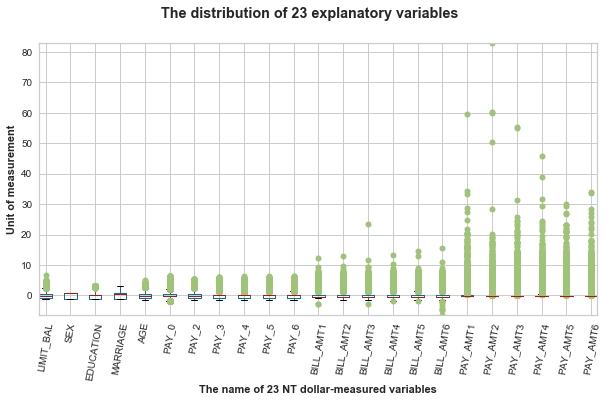

In [74]:
boxplot=standardized_x_pandas.boxplot(figsize=(10,5),rot=80,sym='go')
plt.suptitle('The distribution of %d explanatory variables'%len(standardized_x_pandas.columns)
             ,fontweight='bold')
plt.ylabel('Unit of measurement',fontweight='bold')
plt.xlabel('The name of %d NT dollar-measured variables'%len(standardized_x_pandas.columns),fontweight='bold')
plt.autoscale(enable=True,axis='both',tight=True)
plt.show()

# Spot-checking Classification Algorithms

## Spot checking and Cross Validation

Spot-checking is a way of discovering which algorithms perform well on your machine learning
problem. You cannot know which algorithms are best suited to your problem beforehand. You
must trial a number of methods and focus attention on those that prove themselves the most
promising.

Furthermore, to avoid overfitting issues during spot-checking classification algorithms, in this project, k-fold cross validation technique is used to estimate default detection performance. In one round of k-fold cross-validation, the dataset is first randomly divided into k subsets (or folds), which are of approximately equal size and are mutually exclusive. A machine learning model is then trained and tested k times, where in each time, one of the subsets is set aside as the testing
data and the remaining k1 subsets are used as training
data. The final testing results are predicted from k trained
sub-models. In our experimental studies, 10 cross validations
(i.e., k = 10) are used as the validation method.



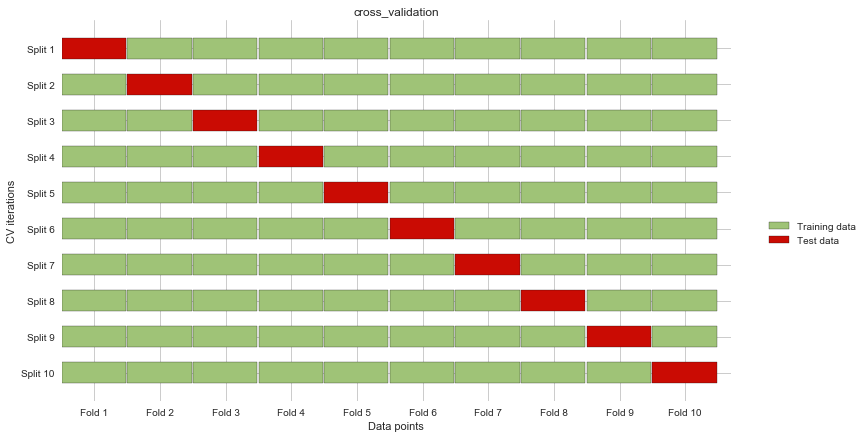

In [76]:
def plot_cross_validation(n_folds,n_samples,figsize):
    plt.figure(figsize=figsize)#(12, 2)
    plt.title("cross_validation")
    axes = plt.gca()
    axes.set_frame_on(False)

    n_folds = n_folds#10
    n_samples = n_samples #50

    n_samples_per_fold = n_samples / float(n_folds)

    for i in range(n_folds):
        colors = ["g"] * n_folds
        colors[i] = "r"
        bars = plt.barh(
            y=range(n_folds), width=[n_samples_per_fold - 0.1] * n_folds,
            left=i * n_samples_per_fold, height=.6, color=colors,# hatch="//",
            edgecolor='k', align='edge')
    axes.invert_yaxis()
    axes.set_xlim(0, n_samples + 1)
    plt.ylabel("CV iterations")
    plt.xlabel("Data points")
    plt.xticks(np.arange(n_samples_per_fold / 2., n_samples,
                         n_samples_per_fold),
               ["Fold %d" % x for x in range(1, n_folds + 1)])
    plt.yticks(np.arange(n_folds) + .3,
               ["Split %d" % x for x in range(1, n_folds + 1)])
    plt.legend([bars[0], bars[n_folds-1]], ['Training data', 'Test data'],
               loc=(1.05, 0.4), frameon=False)

plot_cross_validation(10,50,(12, 7))

## Defining a model comparing function

In [77]:
def model_compare(models,X, y,cv,scoring = 'roc_auc'):
    """
    model: the list of models is needed to check
    X,y: input and output data, typically the training dataset
    cv: integer or kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    scoring: which criterior is used to evaluate model
    """
    competing_model_score = []
    results = []
    names = []
    print(Bold+"I am doing my job. Please, wait....."+ End)
    for name, model in models:
        scoring = scoring
        training_time = []
        start = timer()
        cv_results = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        training_time.append((timer() - start)/60)
        val = [name, cv_results.mean(), cv_results.std(),sum(training_time)]
        competing_model_score.append(val)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg) 
    print(Bold+"I am done !"+ End)
    compared_results = pd.DataFrame(competing_model_score,)
    compared_results.columns = ['Model', 'ROAUC_mean',
                         'Std', 'Trainging time (mins)']
    print(Bold+'The comparing results of %d different algorithms:'%(len(models))+End)
    print(compared_results)
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    plt.boxplot(results,vert=False, showmeans=True)  
    ax.set_yticklabels(names)
    plt.grid(which='major',linestyle=':',linewidth=0.9)
    plt.title('The distribution of AUROC of %d different algorithms'%len(models),
          fontsize=14,fontweight='bold')
    plt.ylabel('The name of %d algorithms'%(len(models)), fontsize=11)
    plt.xlabel('AUROC', fontsize=11)
    plt.show()
    return results, names, compared_results   

## No SMOTE

I am doing my job. Please, wait.....
RidgeClass: 0.720303 (0.016135)
Logit: 0.725909 (0.014908)
KNN: 0.612437 (0.008132)
I am done !
The comparing results of 3 different algorithms:
        Model  ROAUC_mean       Std  Trainging time (mins)
0  RidgeClass    0.720303  0.016135               0.004020
1       Logit    0.725909  0.014908               0.053384
2         KNN    0.612437  0.008132               0.068920


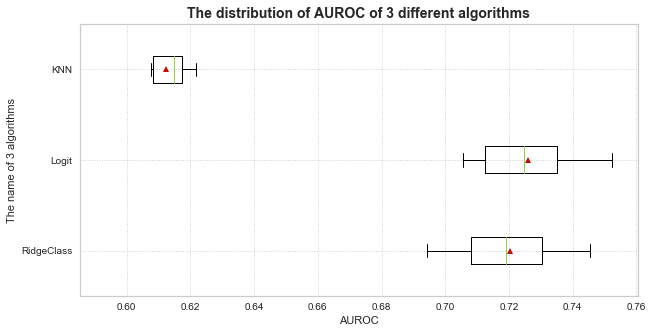

In [79]:
models_base = []
models_base.append(('RidgeClass', RidgeClassifier()))
models_base.append(('Logit',LogisticRegression(solver='liblinear',
                                            penalty='l1',fit_intercept=False)))
models_base.append(('KNN',KNeighborsClassifier()))
#models_base.append(('SCV',SVC()))
scoring = 'roc_auc'
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
results_base, names_base, compared_results_base=model_compare(models_base,X_train,y_train,
                                                              cv=kfold,scoring = scoring)

## SMOTE

Please, wait.....
RidgeClass: 0.745176 (0.008990)
Logit: 0.748152 (0.008484)
KNN: 0.835801 (0.007223)
I am done !
The comparing results of 3 different algorithms:
        Model  ROAUC_mean       Std  Trainging time (s)
0  RidgeClass    0.745176  0.008990            0.317719
1       Logit    0.748152  0.008484            8.186985
2         KNN    0.835801  0.007223            7.108296


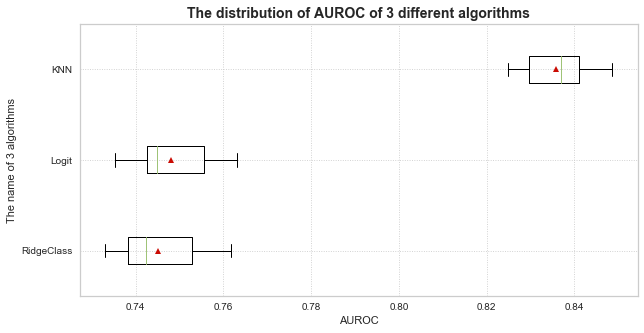

In [80]:
models = []
models.append(('RidgeClass', RidgeClassifier()))
models.append(('Logit',LogisticRegression(solver='liblinear',
                                            penalty='l1',fit_intercept=False)))
models.append(('KNN',KNeighborsClassifier()))

competing_model_score = []
results = []
names = []
print(Bold+"Please, wait....."+ End)
for name, model in models:
    scoring = 'roc_auc'
    training_time = []
    kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    start = timer()
    cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    training_time.append(timer() - start)
    val = [name, cv_results.mean(), cv_results.std(),sum(training_time)]
    competing_model_score.append(val)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 
print(Bold+"I am done !"+ End)

compared_results = pd.DataFrame(competing_model_score,)
compared_results.columns = ['Model', 'ROAUC_mean',
                         'Std', 'Trainging time (s)']
print(Bold+'The comparing results of %d different algorithms:'%(len(models))+End)
print(compared_results)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.boxplot(results,vert=False, showmeans=True)  
ax.set_yticklabels(names)
plt.grid(which='major',linestyle=':',linewidth=0.9)
plt.title('The distribution of AUROC of %d different algorithms'%len(models),
          fontsize=14,fontweight='bold')
plt.ylabel('The name of %d algorithms'%(len(models)), fontsize=11)
plt.xlabel('AUROC', fontsize=11)
plt.show()

$$\textbf{Comments:}$$

The results suggest digging deeper into the KNN algorithm. It is very likely that configuration beyond the default may yield even more accurate models.

## Comparing two approaches

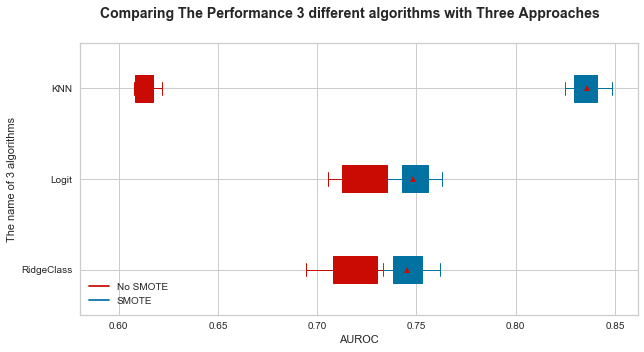

In [83]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.suptitle('Comparing The Performance %d different algorithms with Three Approaches'%len(models),
          fontsize=14,fontweight='bold')
bp_base=plt.boxplot(results_base,vert=False, showmeans=True,patch_artist=True) 
set_box_color(bp_base, 'r') 
bp_variant1=plt.boxplot(results,vert=False, showmeans=True,patch_artist=True) 
set_box_color(bp_variant1, 'b') 
#bp_variant2=plt.boxplot(results_pip,vert=False, showmeans=True,patch_artist=True)  
#set_box_color(bp_variant2, 'g') 
plt.plot([], c='r', label='No SMOTE')
plt.plot([], c='b', label='SMOTE')
#plt.plot([], c='g', label='SMOTE, Pipeline, and Standardization')
plt.legend()
ax.set_yticklabels(names_base)
plt.ylabel('The name of %d algorithms'%(len(models_base)), fontsize=11)
plt.xlabel('AUROC', fontsize=11)
plt.legend()
plt.show()

$$\textbf{Comments:}$$

Based on Figure above, one can see how important the Resampling to the performance of Machine Learning models. Indeed, they improve the performance of all three Machine Learning models, in particular the model with the KNN algorithm. For example, without resampling, the performance of the model with the KNN algorithm is the worst among the three Machine Learning models. However, after resampling, the performance of this model is significantly competitive with other twos. Thus, we argue that one should consider this approach when developing a Machine Learning model.

However, it is worth noting that the results above might be over-stated. This is because we do 10-fold-cross-validation of the three Machine Learning models based on the 'fake' dataset. To strengthen our finding, let's train Machine Learning model based on two cases (raw data and 'fake' data). Afterward, these two trained models is validated on the test data as follows.



# Role of Resampling

## Defining a evaluation function

In [84]:
def get_model_evaluation(estimator,X_train,y_train,X_test,y_test,
                         train_sizes, cv, scoring,n_jobs):
    """
    estimator: 
    X_train,y_train,X_test,y_test
    train_sizes: an array such as [0.1, 0.33, 0.55, 0.78, 1. ]
    cv:
    scoring: string such as 'roc_auc'
    """
    start = timer()
    print(Bold+'The configuration of the Machine Learning model:'+End)
    print(estimator)
    #print(Bold+Red+'I am doing my job. Please wait!'+End)
    #print(Bold+Red+'............'+End)
    print(Bold+Red+'Now, I am training and evaluating model'+End)
    print(Bold+Red+'............'+End)    
    # training model
    estimator.fit(X_train,y_train)
    # making predictions
    predicted=estimator.predict(X_test)
    prob_predicted=estimator.predict_proba(X_test)
    # plotting confusion matrix
    disp = plot_confusion_matrix(estimator, X_test, y_test,
                                 display_labels=None,
                                 cmap='Oranges',
                                 values_format='d',
                                 normalize=None)
    disp.ax_.set_title("Confusion Matrix",fontsize=14,
          fontweight='bold',color='tab:orange')
    plt.grid(False)
    # classification report and AUROC
    print(Bold + '\nClassification Report:' + End)
    print(classification_report(y_test, predicted))
    print(Bold+'ROC Score:' + End +'%.2f'%(roc_auc_score(y_test, prob_predicted[:,1])))
    
    # Learning Curve
    print(Bold+Red+'Now, I am computing the learning curve'+End)
    print(Bold+Red+'............'+End)
    train_sizes, train_scores, test_scores = learning_curve(estimator,
                                                            X_train,y_train, train_sizes=train_sizes,
                                                            cv=cv, scoring=scoring,
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.figure(figsize=(12, 5))
    plt.title("Learning Curve",
         fontsize=14,fontweight='bold',color='b')
    plt.plot(train_sizes, train_scores_mean, marker='o', color="blue",
             label="Training score", linestyle='--')
    plt.plot(train_sizes, test_scores_mean, marker='v', color="green",
             label="Valid score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.autoscale(enable=True, axis='both',tight=True)
    plt.grid(which='major',linestyle=':',linewidth=0.9) 
    plt.ylabel(scoring,fontsize=12)
    plt.xlabel('Train size',
           fontsize=12,
           fontweight='normal',color='k')
    plt.legend(loc="best")
    print(Bold+Red+'I am done in %.2f mins' %((timer() - start)/60)+End)
    return estimator,train_sizes, train_scores, test_scores

## Model without SMOTE

The configuration of the Machine Learning model:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Now, I am training and evaluating model
............

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4710
           1       0.36      0.19      0.25      1290

    accuracy                           0.75      6000
   macro avg       0.58      0.55      0.55      6000
weighted avg       0.71      0.75      0.72      6000

ROC Score:0.60
Now, I am computing the learning curve
............
I am done in 0.18 mins


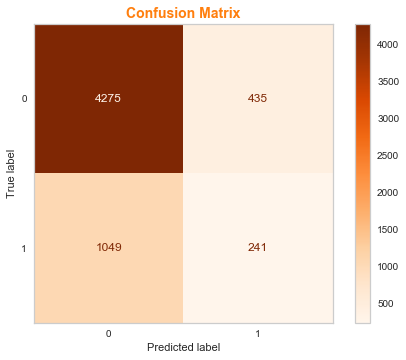

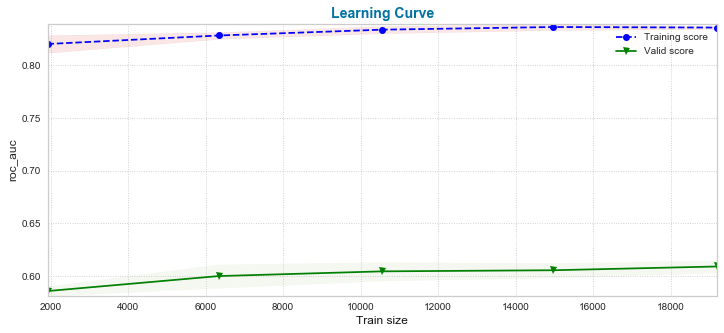

In [86]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
train_sizes=[0.1, 0.33, 0.55, 0.78, 1. ]
score='roc_auc'
knn_default=KNeighborsClassifier()
knn_eval,train_sizes_eval, knn_train_scores_eval, knn_test_scores_eval=get_model_evaluation(knn_default,
                                                                          X_train, y_train,
                                                                          X_test,y_test,
                                                                          train_sizes=train_sizes, 
                                                                          cv=cv, scoring=score,n_jobs=4)

$\textbf{Comments:}$ We can see that the performance of the KNN-based model without SMOTE yields the following bad resutls.

1. A significantly high number of false negative. Indeed, the distribution of false negative and true postive is highly imblanced, which is skewed to false negative. Indeed, the number of false negative and true positive are 1049 and 241, respectively. Such a high number of false negative is caused by imbalanced data, in which the number of negative instances is considerably higher than that of positive instances. On the other hand, the AUROC is 0.60. 

2. We see that the gap between two Learning Curve is large and the AUROC on the training data is high but low for the validation data. This findings imply the model suffers from the high variance, low Bias, and overfitting.

## Model with SMOTE

The configuration of the Machine Learning model:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Now, I am training and evaluating model
............

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.61      0.70      4710
           1       0.27      0.53      0.36      1290

    accuracy                           0.59      6000
   macro avg       0.55      0.57      0.53      6000
weighted avg       0.71      0.59      0.63      6000

ROC Score:0.60
Now, I am computing the learning curve
............
I am done in 0.39 mins


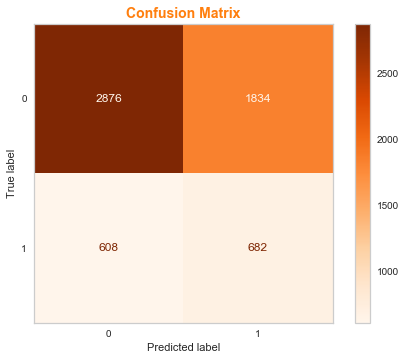

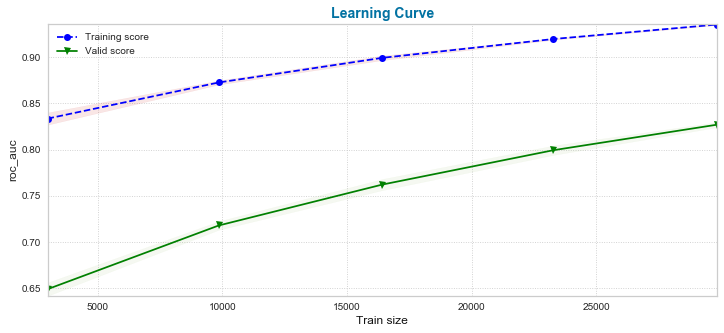

In [85]:
knn_eval,train_sizes_eval, knn_train_scores_eval, knn_test_scores_eval=get_model_evaluation(knn_default,
                                                                          X_resampled, y_resampled,
                                                                          X_test,y_test,
                                                                          train_sizes=train_sizes, 
                                                                          cv=cv, scoring=score,n_jobs=4)

$\textbf{Comments:}$ Using resmapling with SMOTE, we can see that the performance of the KNN-based model is improved as the following aspects.

1. The number of true positive significnatly increase to 682 from 241, whereas the number of false negative considerably decrease to 608 from over 1000. Thus, the distribution of the number of true positive and false negative is fairly balanced.

2. The gap between two Learning curve narrow graduately. It implies the problem of high variance reduces. Furthermore, both AUROC on training and validation data increase when the train size increase. It implies the problem of overfitting reduces.
